In [34]:
# ライブラリの読み込み
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [10]:
# データの読み込み
(data_train, target_train), (data_test, target_test) = mnist.load_data()

# Conv2D の inputに合わせて変形
X_train = data_train.reshape(-1, 28, 28, 1)
X_test = data_test.reshape(-1, 28, 28, 1)

# 特徴量を0~1に正規化する
X_train = X_train / 255
X_test = X_test / 255

# ラベルを1 hot 表現に変換
y_train = to_categorical(target_train, 10)
y_test = to_categorical(target_test, 10)

In [11]:
# モデルの構築
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)              

In [18]:
# 学習
early_stopping = EarlyStopping(
                        monitor='val_loss',
                        min_delta=0.0,
                        # patience=2,
                )

history = model.fit(X_train, y_train,
                    batch_size=1024,
                    epochs=100,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    #callbacks=[early_stopping],
                    )


Epoch 1/100
59/59 - 4s - loss: 0.0734 - accuracy: 0.9780 - val_loss: 0.0303 - val_accuracy: 0.9888
Epoch 2/100
59/59 - 4s - loss: 0.0712 - accuracy: 0.9790 - val_loss: 0.0296 - val_accuracy: 0.9887
Epoch 3/100
59/59 - 4s - loss: 0.0691 - accuracy: 0.9788 - val_loss: 0.0289 - val_accuracy: 0.9894
Epoch 4/100
59/59 - 4s - loss: 0.0727 - accuracy: 0.9783 - val_loss: 0.0297 - val_accuracy: 0.9893
Epoch 5/100
59/59 - 4s - loss: 0.0690 - accuracy: 0.9794 - val_loss: 0.0281 - val_accuracy: 0.9902
Epoch 6/100
59/59 - 4s - loss: 0.0673 - accuracy: 0.9793 - val_loss: 0.0281 - val_accuracy: 0.9898
Epoch 7/100
59/59 - 4s - loss: 0.0684 - accuracy: 0.9797 - val_loss: 0.0282 - val_accuracy: 0.9897
Epoch 8/100
59/59 - 4s - loss: 0.0669 - accuracy: 0.9798 - val_loss: 0.0283 - val_accuracy: 0.9897
Epoch 9/100
59/59 - 4s - loss: 0.0684 - accuracy: 0.9791 - val_loss: 0.0287 - val_accuracy: 0.9894
Epoch 10/100
59/59 - 4s - loss: 0.0684 - accuracy: 0.9797 - val_loss: 0.0283 - val_accuracy: 0.9892
Epoch 11/

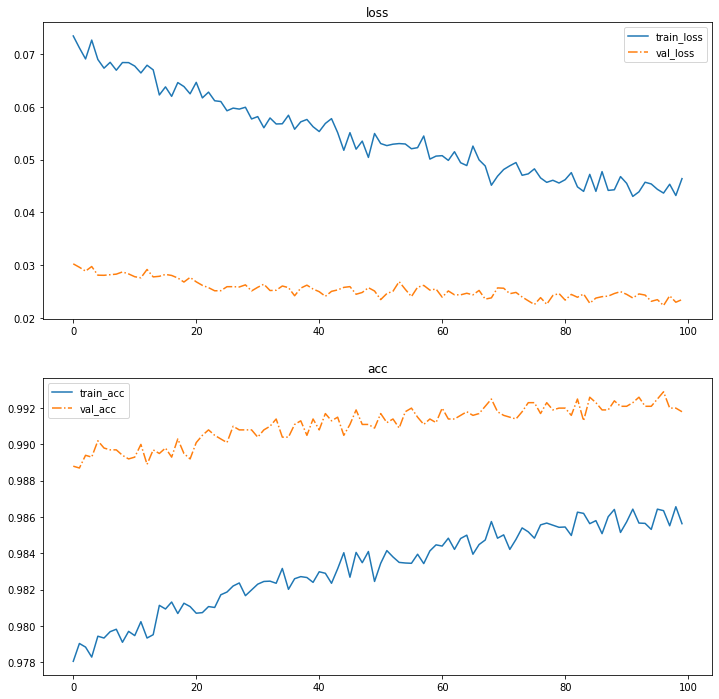

In [19]:
# Epoch ごとの正解率と損失関数のプロット
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(2, 1, 1, title="loss")
ax.plot(history.epoch, history.history["loss"], label="train_loss")
ax.plot(history.epoch, history.history["val_loss"], linestyle="-.", label="val_loss")
ax.legend()
ax = fig.add_subplot(2, 1, 2, title="acc")
ax.plot(history.epoch, history.history["accuracy"], label="train_acc")
ax.plot(history.epoch, history.history["val_accuracy"], linestyle="-.", label="val_acc")
ax.legend()
plt.show()

In [20]:
# 評価
y_predict = model.predict_classes(X_train)
print(classification_report(target_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



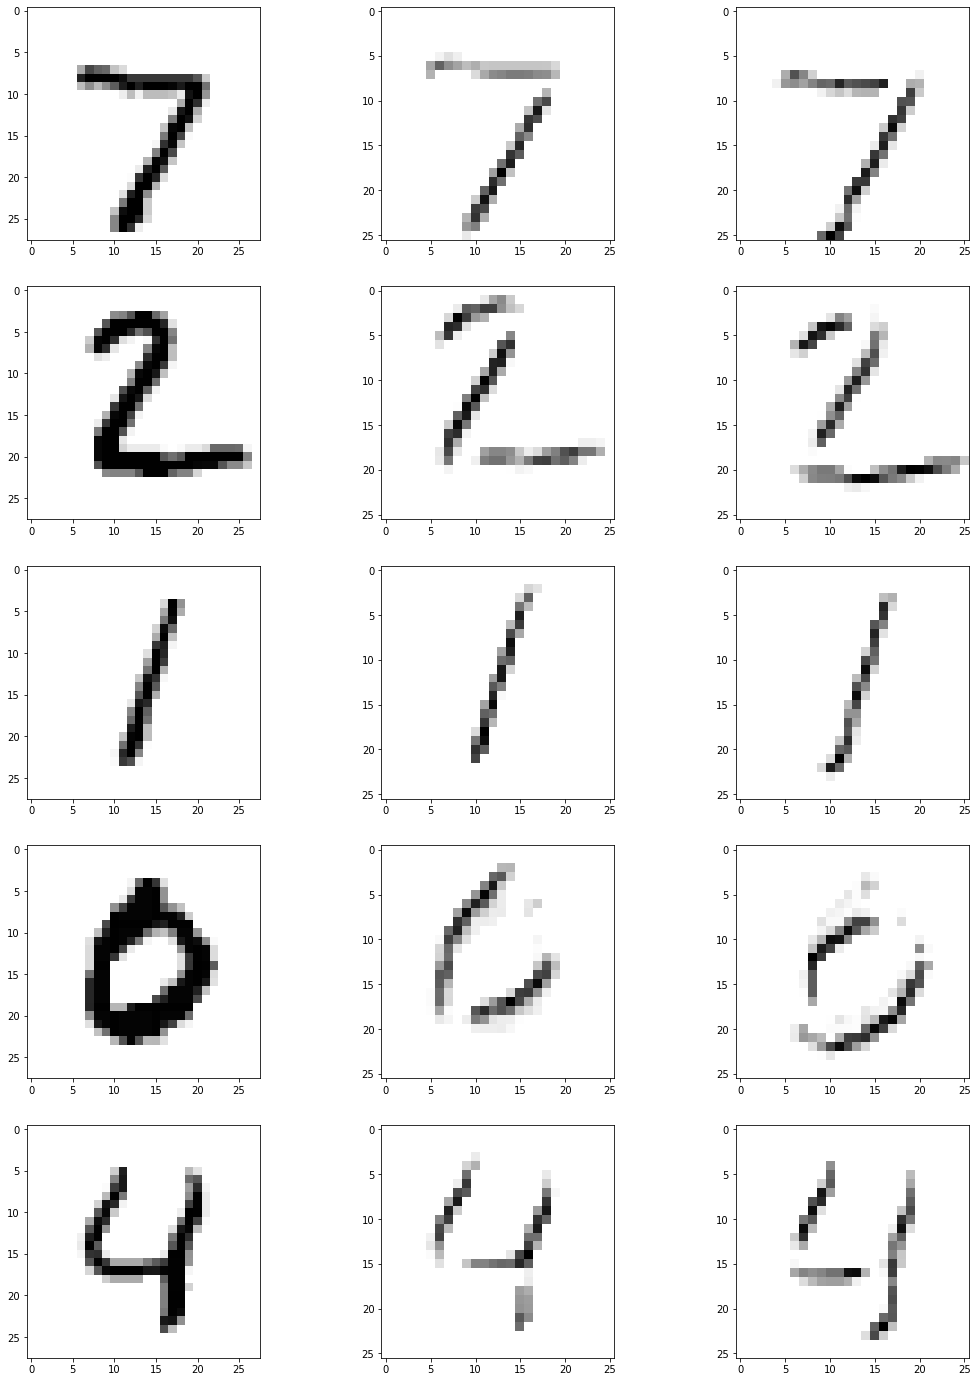

In [21]:
model_2 = Sequential()
model_2.add(model.layers[0])

# 元画像と1層目の出力2個を可視化
fig = plt.figure(figsize=(18, 30))
for i in range(5):
    # print(y_test[i].argmax())
    ax = fig.add_subplot(6, 3, 3*i+1)
    ax.imshow(X_test[i][:, :, 0], cmap='gray_r')
    ax = fig.add_subplot(6, 3, 3*i+2)
    ax.imshow(model_2.predict(X_test[i:i+1])[0][:, :, 0], cmap='gray_r')
    ax = fig.add_subplot(6, 3, 3*i+3)
    ax.imshow(model_2.predict(X_test[i:i+1])[0][:, :, 1], cmap='gray_r')
plt.show()

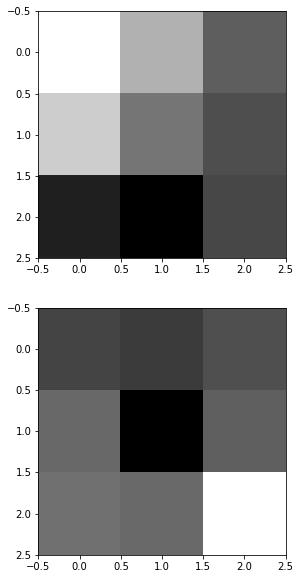

In [17]:
fig = plt.figure(figsize=(5,10))
for i in range(2):
    w = model_2.get_weights()[0][:, :, 0, i].reshape(3, 3)
    ax = fig.add_subplot(2, 1, i+1)
    ax.imshow(w, cmap='gray_r')
plt.show()

---
# 入力層
---

In [116]:
X_test.shape
model_2 = Sequential()
model_2.add(model.layers[0])
ev = 15

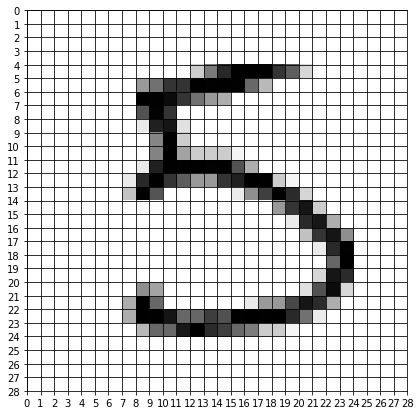

In [117]:
fig = plt.figure(figsize=[7,7])
ax = plt.gca()
ax.imshow(X_test[ev][:,:,0],'gray_r')
ax.set_xlim(0,27.5)
ax.set_ylim(27.5,0)
ax.set_xticks(np.arange(-.5, 28, 1))
ax.set_yticks(np.arange(-.5, 28, 1))
ax.set_xticklabels(np.arange(0, 29, 1))
ax.set_yticklabels(np.arange(0, 29, 1))
ax.grid(color='black')
fig.savefig('input_cnn.pdf')

---
# 畳み込み層
---

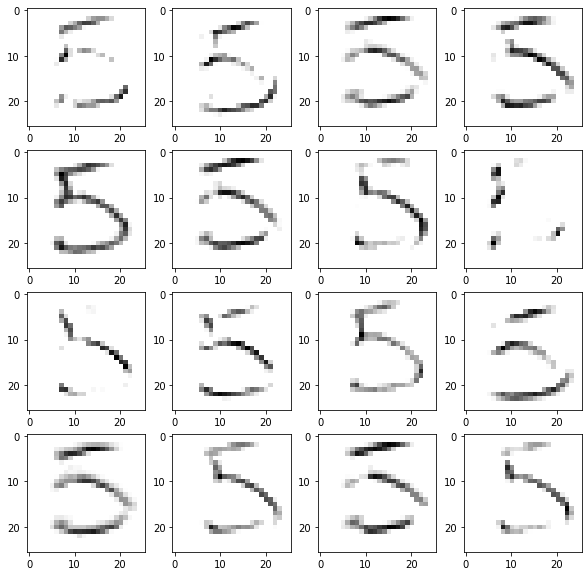

In [118]:
fig = plt.figure(figsize=[10,10])
cnn_out = []

for i in range(16):
    cnn_out.append(model_2.predict(X_test[ev:ev+1])[0][:, :, i])
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(cnn_out[i],'gray_r')


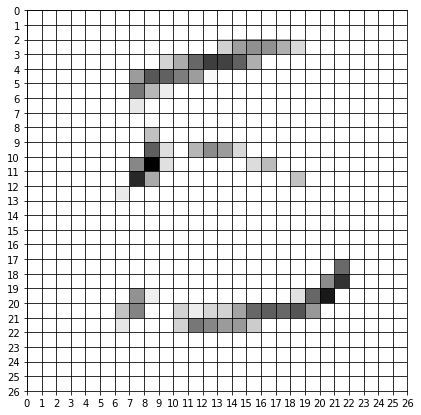

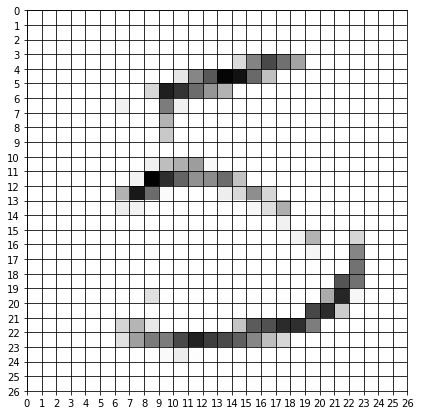

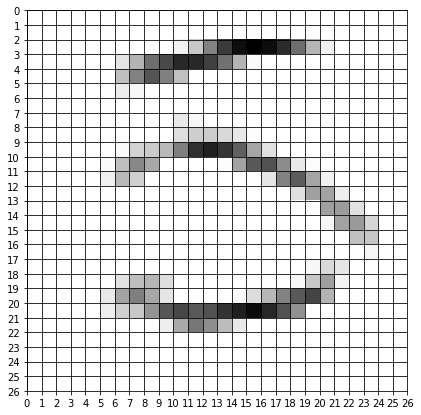

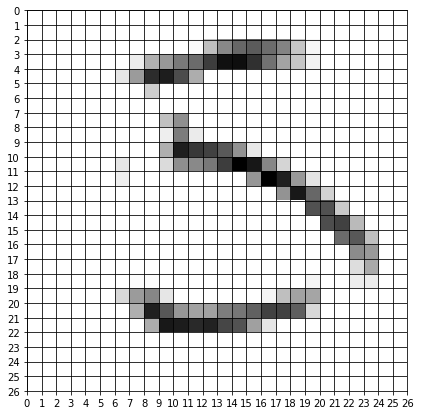

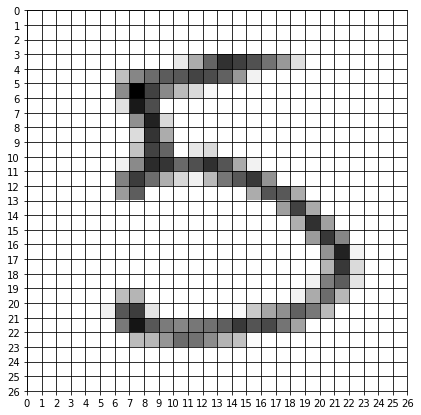

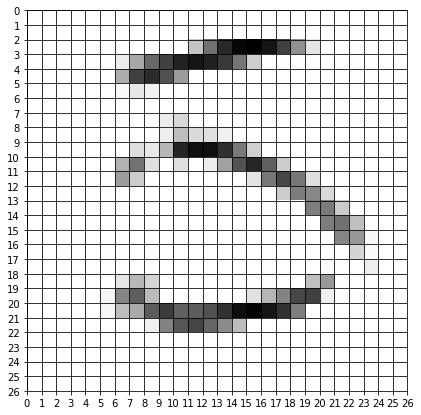

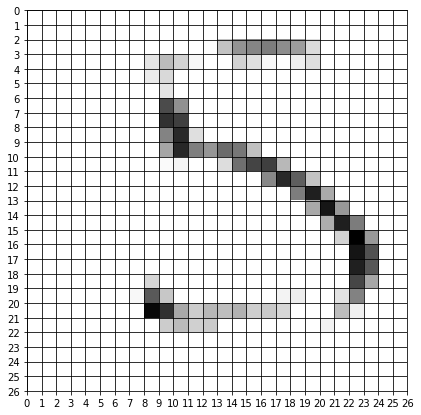

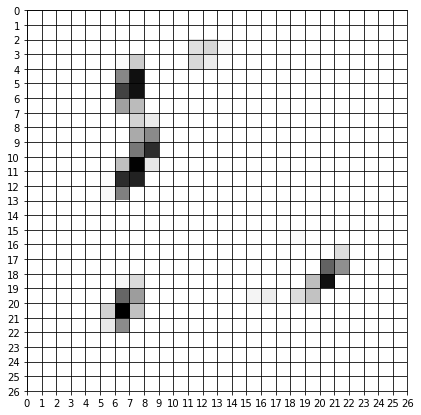

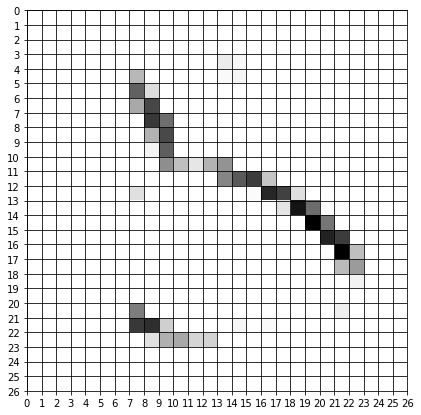

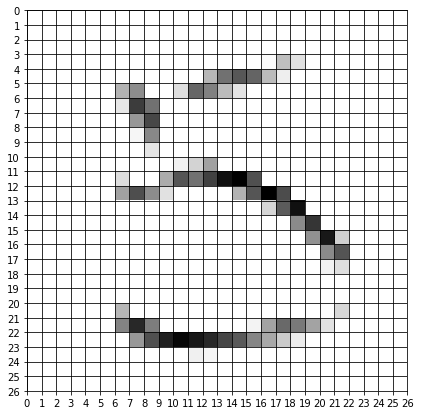

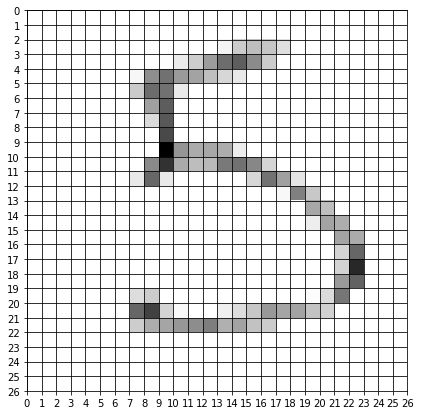

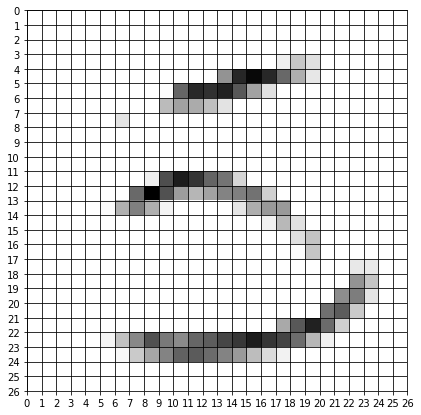

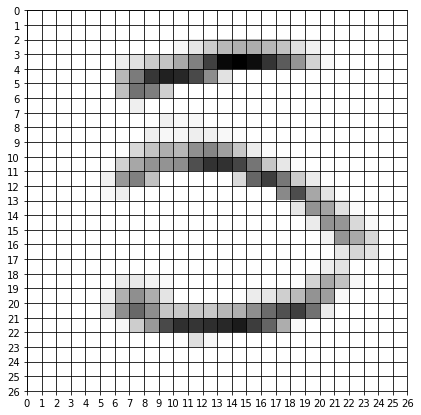

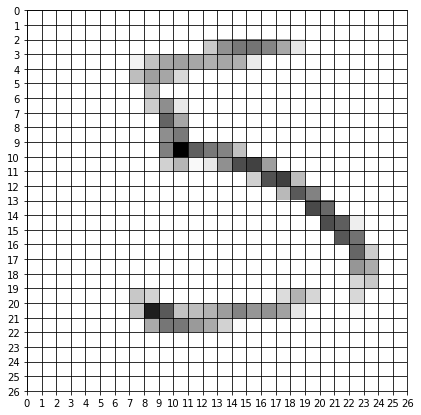

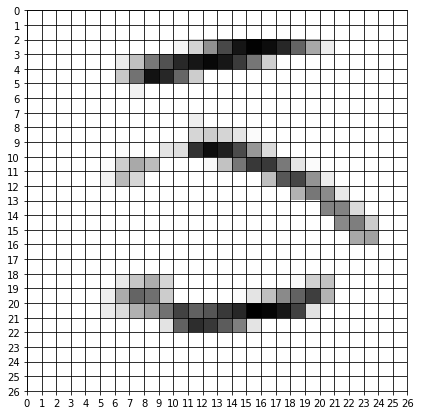

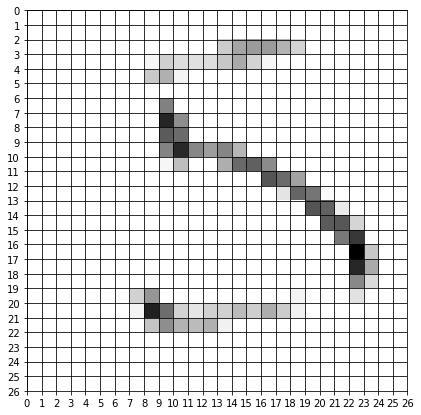

In [130]:
plot_cnn = []
cnn_w = []

for i in range(16):
    plot_cnn.append(cnn_out[i])
    cnn_w.append(model_2.get_weights()[0][:, :, 0, i].reshape(3, 3))
    fig = plt.figure(figsize=[7,7])
    ax = plt.gca()
    ax.imshow(plot_cnn[i],'gray_r')
    ax.set_xlim(0,25.5)
    ax.set_ylim(25.5,0)
    ax.set_xticks(np.arange(-.5, 26, 1))
    ax.set_yticks(np.arange(-.5, 26, 1))
    ax.set_xticklabels(np.arange(0, 27, 1))
    ax.set_yticklabels(np.arange(0, 27, 1))
    ax.grid(color='black')
    plt.show()
    fig.savefig('cnn_out'+str(i)+'.pdf')
    

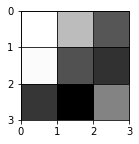

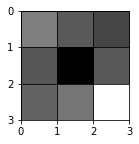

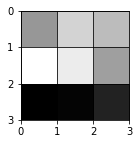

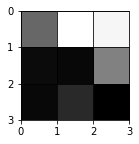

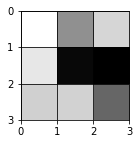

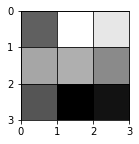

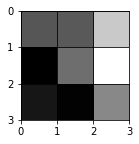

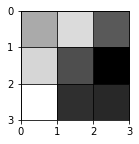

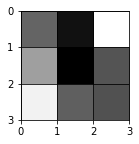

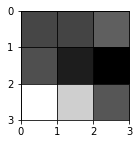

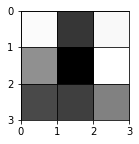

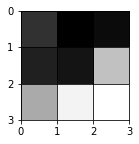

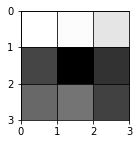

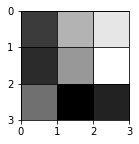

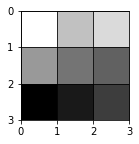

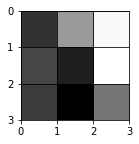

In [132]:
for i in range(16):
    fig = plt.figure(figsize=[2,2])
    ax = plt.gca()
    ax.imshow(cnn_w[i],'gray_r')
    ax.set_xlim(0,2.5)
    ax.set_ylim(2.5,0)
    ax.set_xticks(np.arange(-.5, 3, 1))
    ax.set_yticks(np.arange(-.5, 3, 1))
    ax.set_xticklabels(np.arange(0, 4, 1))
    ax.set_yticklabels(np.arange(0, 4, 1))
    ax.grid(color='black')
    plt.show()
    fig.savefig('filter'+str(i)+'.pdf')

---
# プーリング層
---

In [122]:
model_3 = Sequential()
model_3.add(model.layers[1])

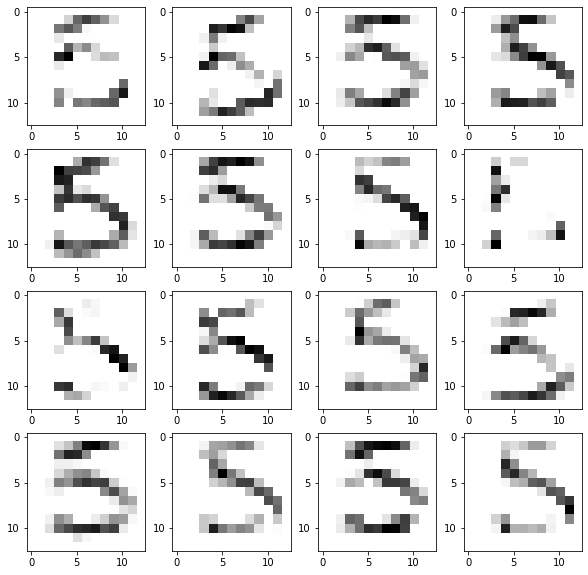

In [123]:
fig = plt.figure(figsize=[10,10])
pooling_out = []

for i in range(16):
    pooling_out.append(model_3.predict(model_2.predict(X_test[ev:ev+1]))[0][:, :, i])
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(pooling_out[i],'gray_r')

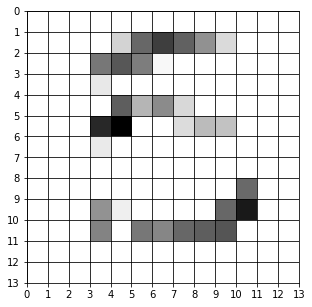

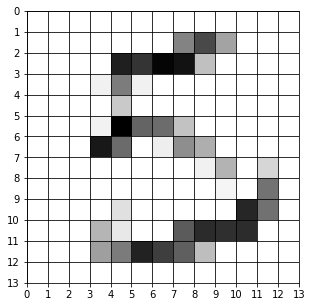

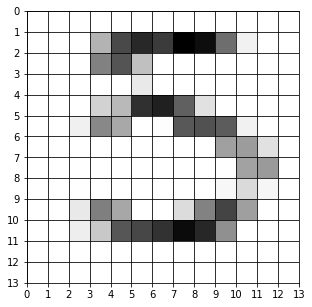

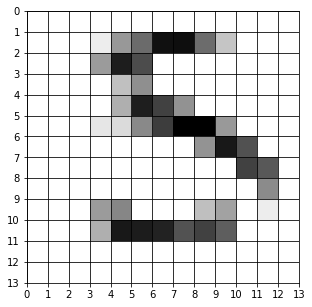

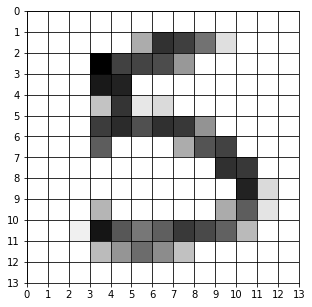

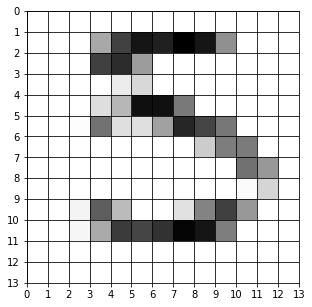

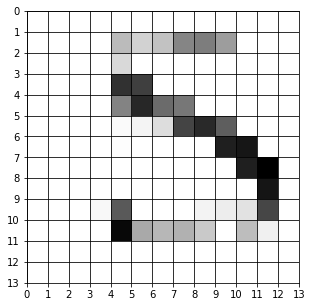

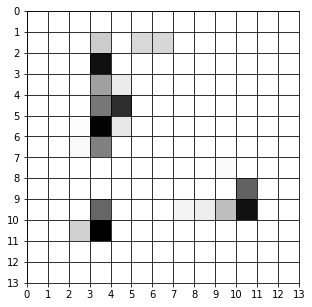

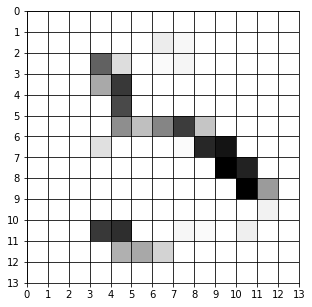

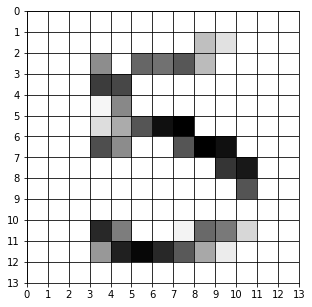

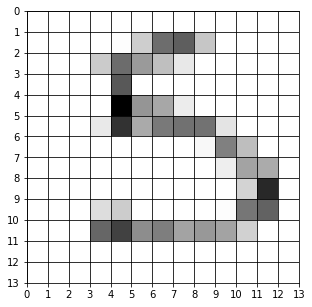

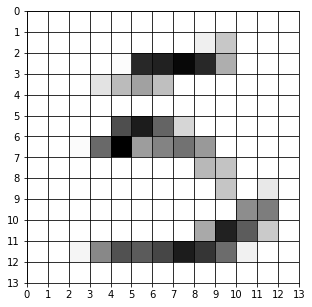

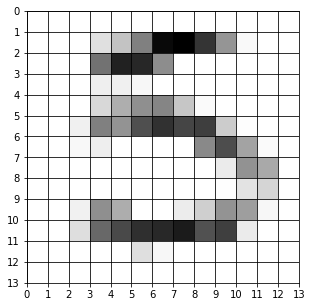

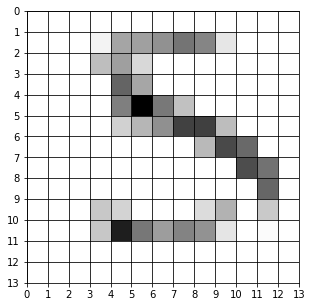

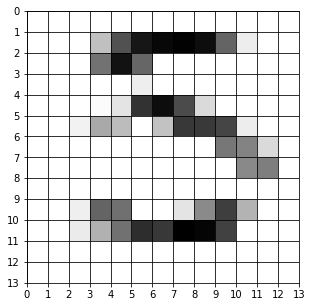

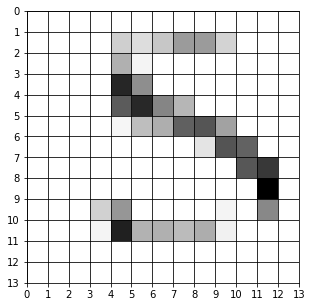

In [134]:
for i in range(16):
    fig = plt.figure(figsize=[5,5])
    ax = plt.gca()
    ax.imshow(pooling_out[i],'gray_r')
    ax.set_xlim(0,12.5)
    ax.set_ylim(12.5,0)
    ax.set_xticks(np.arange(-.5, 13, 1))
    ax.set_yticks(np.arange(-.5, 13, 1))
    ax.set_xticklabels(np.arange(0, 14, 1))
    ax.set_yticklabels(np.arange(0, 14, 1))
    ax.grid(color='black')
    plt.show()
    fig.savefig('pool_out'+str(i)+'.pdf')

---
# Dropout層
---

In [125]:
model_4 = Sequential()
model_4.add(model.layers[2])

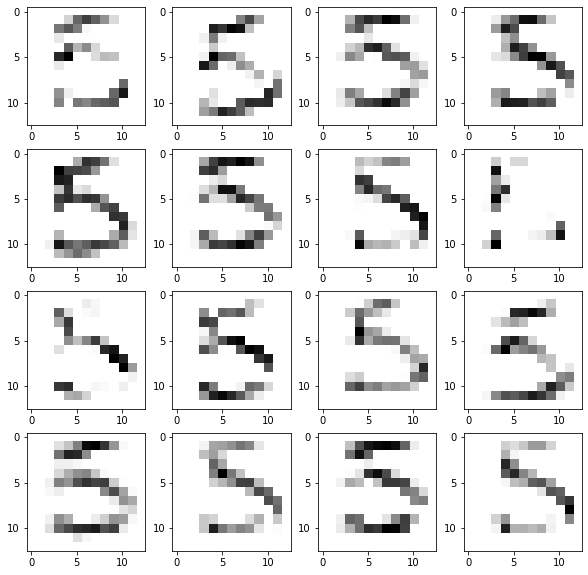

In [126]:
fig = plt.figure(figsize=[10,10])
drop_out = []

for i in range(16):
    drop_out.append(model_4.predict(model_3.predict(model_2.predict(X_test[ev:ev+1])))[0][:, :, i])
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(drop_out[i],'gray_r')


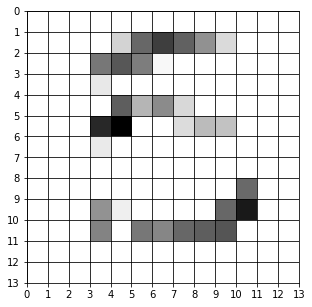

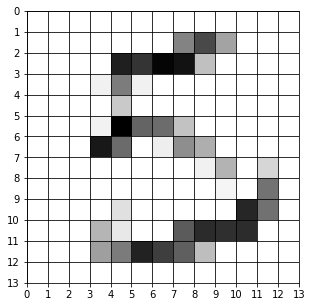

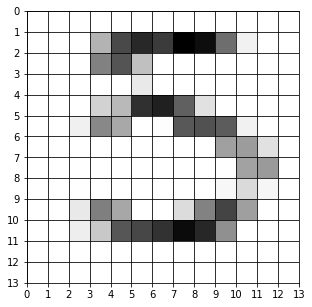

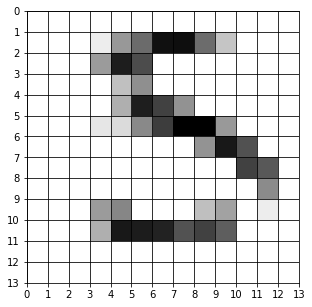

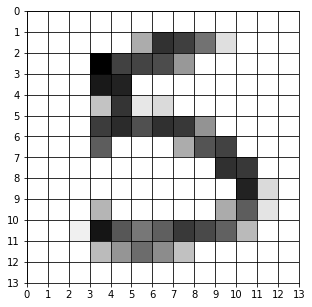

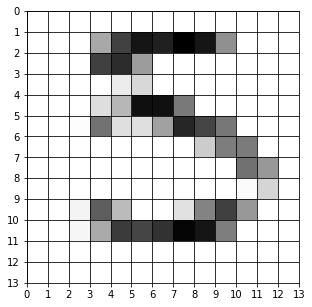

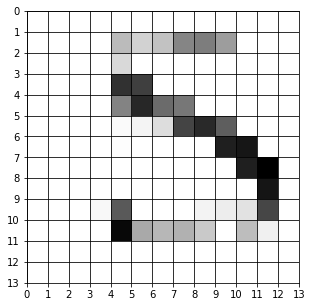

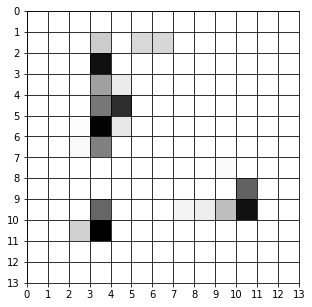

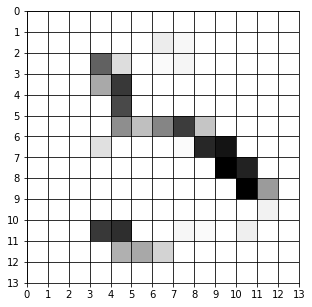

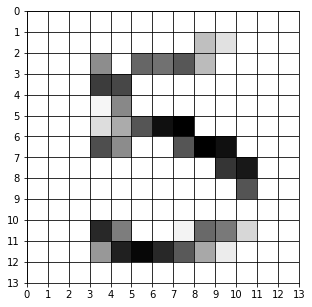

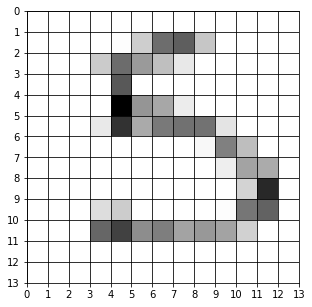

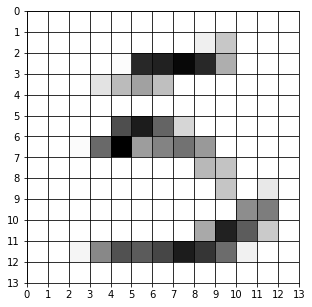

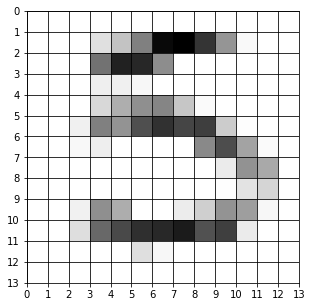

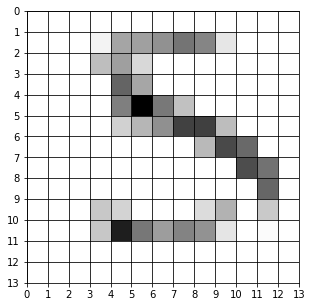

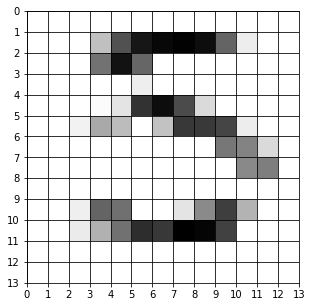

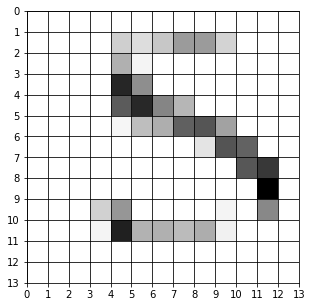

In [135]:
for i in range(16):
    fig = plt.figure(figsize=[5,5])
    ax = plt.gca()
    ax.imshow(drop_out[i],'gray_r')
    ax.set_xlim(0,12.5)
    ax.set_ylim(12.5,0)
    ax.set_xticks(np.arange(-.5, 13, 1))
    ax.set_yticks(np.arange(-.5, 13, 1))
    ax.set_xticklabels(np.arange(0, 14, 1))
    ax.set_yticklabels(np.arange(0, 14, 1))
    ax.grid(color='black')
    plt.show()
    fig.savefig('drop_out'+str(i)+'.pdf')


In [144]:
model_5 = Sequential()
model_5.add(model.layers[3])
model_6 = Sequential()
model_6.add(model.layers[4])
model_7 = Sequential()
model_7.add(model.layers[5])
#Flatten
model_8 = Sequential()
model_8.add(model.layers[6])
#Denes
model_9 = Sequential()
model_9.add(model.layers[7])
#Dropout
model_10 = Sequential()
model_10.add(model.layers[8])
#Output
model_11 = Sequential()
model_11.add(model.layers[9])

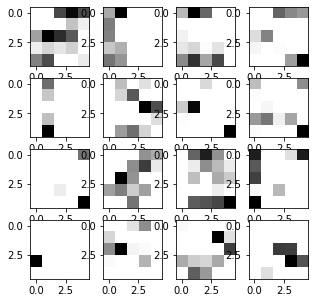

In [209]:
fig = plt.figure(figsize=[5,5])
last_out = []
cnn_out2 = []
pool_out2 = []

for i in range(16):
    cnn_out2.append(model_5.predict(model_4.predict(model_3.predict(model_2.predict(X_test[ev:ev+1]))))[0][:, :, i])
    pool_out2.append(model_6.predict(model_5.predict(model_4.predict(model_3.predict(model_2.predict(X_test[ev:ev+1])))))[0][:, :, i])
    last_out.append(model_7.predict(model_6.predict(model_5.predict(model_4.predict(model_3.predict(model_2.predict(X_test[ev:ev+1]))))))[0][:, :, i])
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(last_out[i],'gray_r')

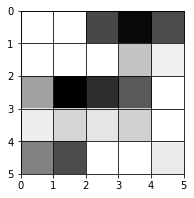

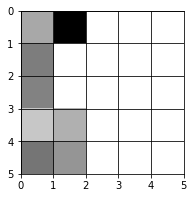

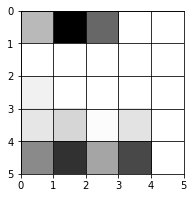

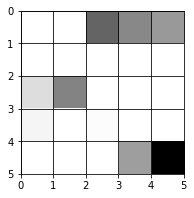

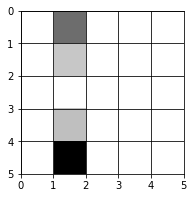

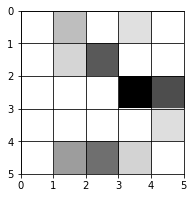

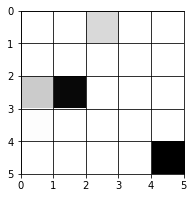

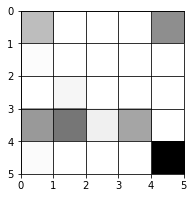

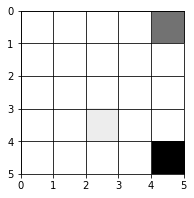

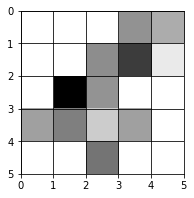

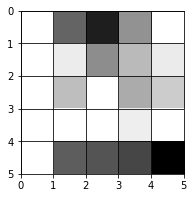

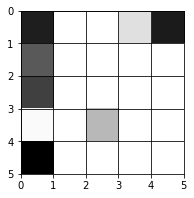

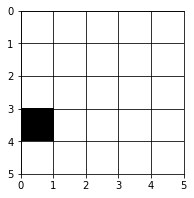

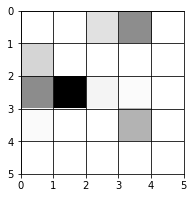

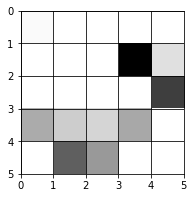

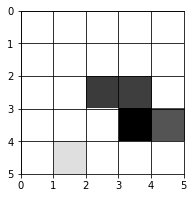

In [143]:
for i in range(16):
    fig = plt.figure(figsize=[3,3])
    ax = plt.gca()
    ax.imshow(last_out[i],'gray_r')
    ax.set_xlim(0,4.5)
    ax.set_ylim(4.5,0)
    ax.set_xticks(np.arange(-.5, 5, 1))
    ax.set_yticks(np.arange(-.5, 5, 1))
    ax.set_xticklabels(np.arange(0, 6, 1))
    ax.set_yticklabels(np.arange(0, 6, 1))
    ax.grid(color='black')
    plt.show()
    fig.savefig('last_out'+str(i)+'.pdf')

In [150]:
flatten = model_8(model_7.predict(model_6.predict(model_5.predict(model_4.predict(model_3.predict(model_2.predict(X_test[ev:ev+1])))))))[0]
dense   = model_9(model_8(model_7.predict(model_6.predict(model_5.predict(model_4.predict(model_3.predict(model_2.predict(X_test[ev:ev+1]))))))))[0]
output  = model_11(model_10(model_9(model_8(model_7.predict(model_6.predict(model_5.predict(model_4.predict(model_3.predict(model_2.predict(X_test[ev:ev+1]))))))))))[0]

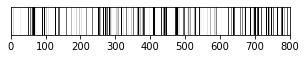

In [206]:
#fig = plt.figure()
fig = plt.figure(figsize=[5,5])
imFlatten = []
for i in range(len(flatten)):
    imFlatten.append(flatten[i])

ax = plt.subplot()
imFlatten = np.array(imFlatten)
ax.imshow(imFlatten.reshape(1, -1), vmin=0.0, vmax=1.0, cmap='gray_r', interpolation='nearest', extent=(0,len(imFlatten),0,len(imFlatten)/10))
ax.get_yaxis().set_visible(False)

plt.show()

fig.savefig('flatten.pdf')

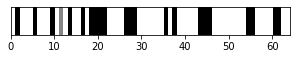

In [207]:
#fig = plt.figure()
fig = plt.figure(figsize=[5,5])
imDense = []
for i in range(len(dense)):
    imDense.append(dense[i])

ax = plt.subplot()
imDense = np.array(imDense)
ax.imshow(imDense.reshape(1, -1), vmin=0.0, vmax=1.0, cmap='gray_r', interpolation='nearest', extent=(0,len(imDense),0,len(imDense)/10))
ax.get_yaxis().set_visible(False)

plt.show()
fig.savefig('dense.pdf')

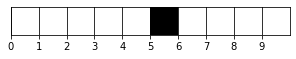

In [295]:
fig = plt.figure(figsize=[5,5])
imOut = []
for i in range(len(output)):
    imOut.append(output[i])

ax = plt.subplot()
imOut = np.array(imOut)
ax.imshow(imOut.reshape(1, -1), vmin=0.0, vmax=1.0, cmap='gray_r', interpolation='nearest', extent=(0,len(imOut),0,len(imOut)/10))
ax.get_yaxis().set_visible(False)
ax.set_xticks(np.arange(0, 10, 1))
ax.grid(color='black')
plt.show()
fig.savefig('output.pdf')

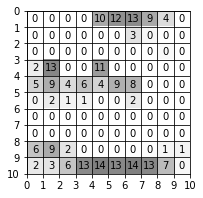

In [286]:
fig = plt.figure(figsize=[3,3])
ax = plt.gca()
cnn_out2_fit = []

for j in range(len(cnn_out2[0])):
    if j==0:
        continue
    fit = []
    for i in range(len(cnn_out2[0][j])):
        if i==0:
            continue
        fit.append(cnn_out2[0][j][i])
    
    cnn_out2_fit.append(fit)
    
cnn_out2_fit=np.array(cnn_out2_fit)
#for i in range(len(cnn_out2[0])):
#    if i<11 or i%12==0 :
#        continue
#    else :
#        print(cnn_out2[0])
#        cnn_out2_fit.append(cnn_out2[0][i])
    
#ax.imshow(cnn_out2[0],cmap='gray_r',alpha=0.)
ax.imshow(cnn_out2_fit,cmap='gray_r',alpha=0.5)
ax.set_xlim(0,9.5)
ax.set_ylim(9.5,0)
ax.set_xticks(np.arange(-.5, 10, 1))
ax.set_yticks(np.arange(-.5, 10, 1))
ax.set_xticklabels(np.arange(0, 11, 1))
ax.set_yticklabels(np.arange(0, 11, 1))
ax.grid(color='black')
ys, xs = np.meshgrid(range(len(cnn_out2_fit)),range(len(cnn_out2_fit)),indexing='ij')
for (x,y,val) in zip(xs.flatten(), ys.flatten(), cnn_out2_fit.flatten()):
    ax.text(x,y,int(val*10), horizontalalignment='center',verticalalignment='center',)
#    ax.text(x,y,'{0:.2f}'.format[0][val], horizontalalignment='center',verticalalignment='center')

plt.show()
fig.savefig('PoolingSample0.pdf')

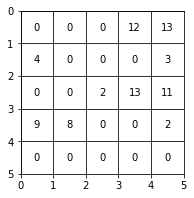

In [294]:
fig = plt.figure(figsize=[3,3])
ax = plt.gca()
pool_out2[0] = [[0,0,0,12,13],[4,0,0,0,3],[0,0,2,13,11],[9,8,0,0,2],[0,0,0,0,0]]
pool_out2[0] = np.array(pool_out2[0])
ys, xs = np.meshgrid(range(pool_out2[0].shape[0]),range(pool_out2[0].shape[1]),indexing='ij')
ax.imshow(pool_out2[0],cmap='gray_r',alpha=0.0)
ax.set_xlim(0,4.5)
ax.set_ylim(4.5,0)
ax.set_xticks(np.arange(-.5, 5, 1))
ax.set_yticks(np.arange(-.5, 5, 1))
ax.set_xticklabels(np.arange(0, 6, 1))
ax.set_yticklabels(np.arange(0, 6, 1))
ax.grid(color='black')
for (x,y,val) in zip(xs.flatten(), ys.flatten(), pool_out2[0].flatten()):
    ax.text(x,y,int(val*1), horizontalalignment='center',verticalalignment='center',)
#    ax.text(x,y,'{0:.2f}'.format[0][val], horizontalalignment='center',verticalalignment='center')

plt.show()
fig.savefig('PoolingSample1.pdf')
